In [1584]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submition = pd.read_csv('sample_submition.csv')
df

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,0,22900,45300,0,66,553,0,0,0,155.0,0.37,43,53,5,48.2,17.9
1,23,14800,40700,1,449,2720,3,0,0,0.0,1.00,32,57,89,13.4,51.0
2,4,6890,24800,0,322,825,0,0,0,0.0,1.00,33,55,18,13.4,51.0
3,8,352,26900,2,38,506,4,75,0,0.0,1.00,33,52,24,13.4,51.0
4,9,17000,53500,4,173,1370,3,0,0,0.0,1.00,44,54,5,13.4,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,22000,44900,0,122,856,8,0,0,136.0,0.63,41,52,7,48.2,17.9
348,29,277,44200,3,95,607,0,89,0,0.0,1.58,33,57,14,13.4,51.0
349,6,5790,30900,5,705,2250,0,0,0,0.0,1.00,43,58,9,13.4,51.0
350,0,448,38900,2,24,482,0,99,0,0.0,4.39,31,53,12,13.4,51.0


In [1587]:

df = df.drop(df[df['Acethylene']>2000].index)

y = df['Health index']
X = df.drop(columns=['Health index'])
test = test.drop(columns=['index'])

In [1588]:
print((X != 0).sum())

X = X.drop('Acethylene', axis=1)
test = test.drop('Acethylene', axis=1)
print((X != 0).sum())

Hydrogen               290
Oxigen                 346
Nitrogen               346
Methane                283
CO                     346
CO2                    346
Ethylene               186
Ethane                 186
Acethylene              21
DBDS                   116
Power factor           346
Interfacial V          346
Dielectric rigidity    346
Water content          345
Life expectation       346
dtype: int64
Hydrogen               290
Oxigen                 346
Nitrogen               346
Methane                283
CO                     346
CO2                    346
Ethylene               186
Ethane                 186
DBDS                   116
Power factor           346
Interfacial V          346
Dielectric rigidity    346
Water content          345
Life expectation       346
dtype: int64


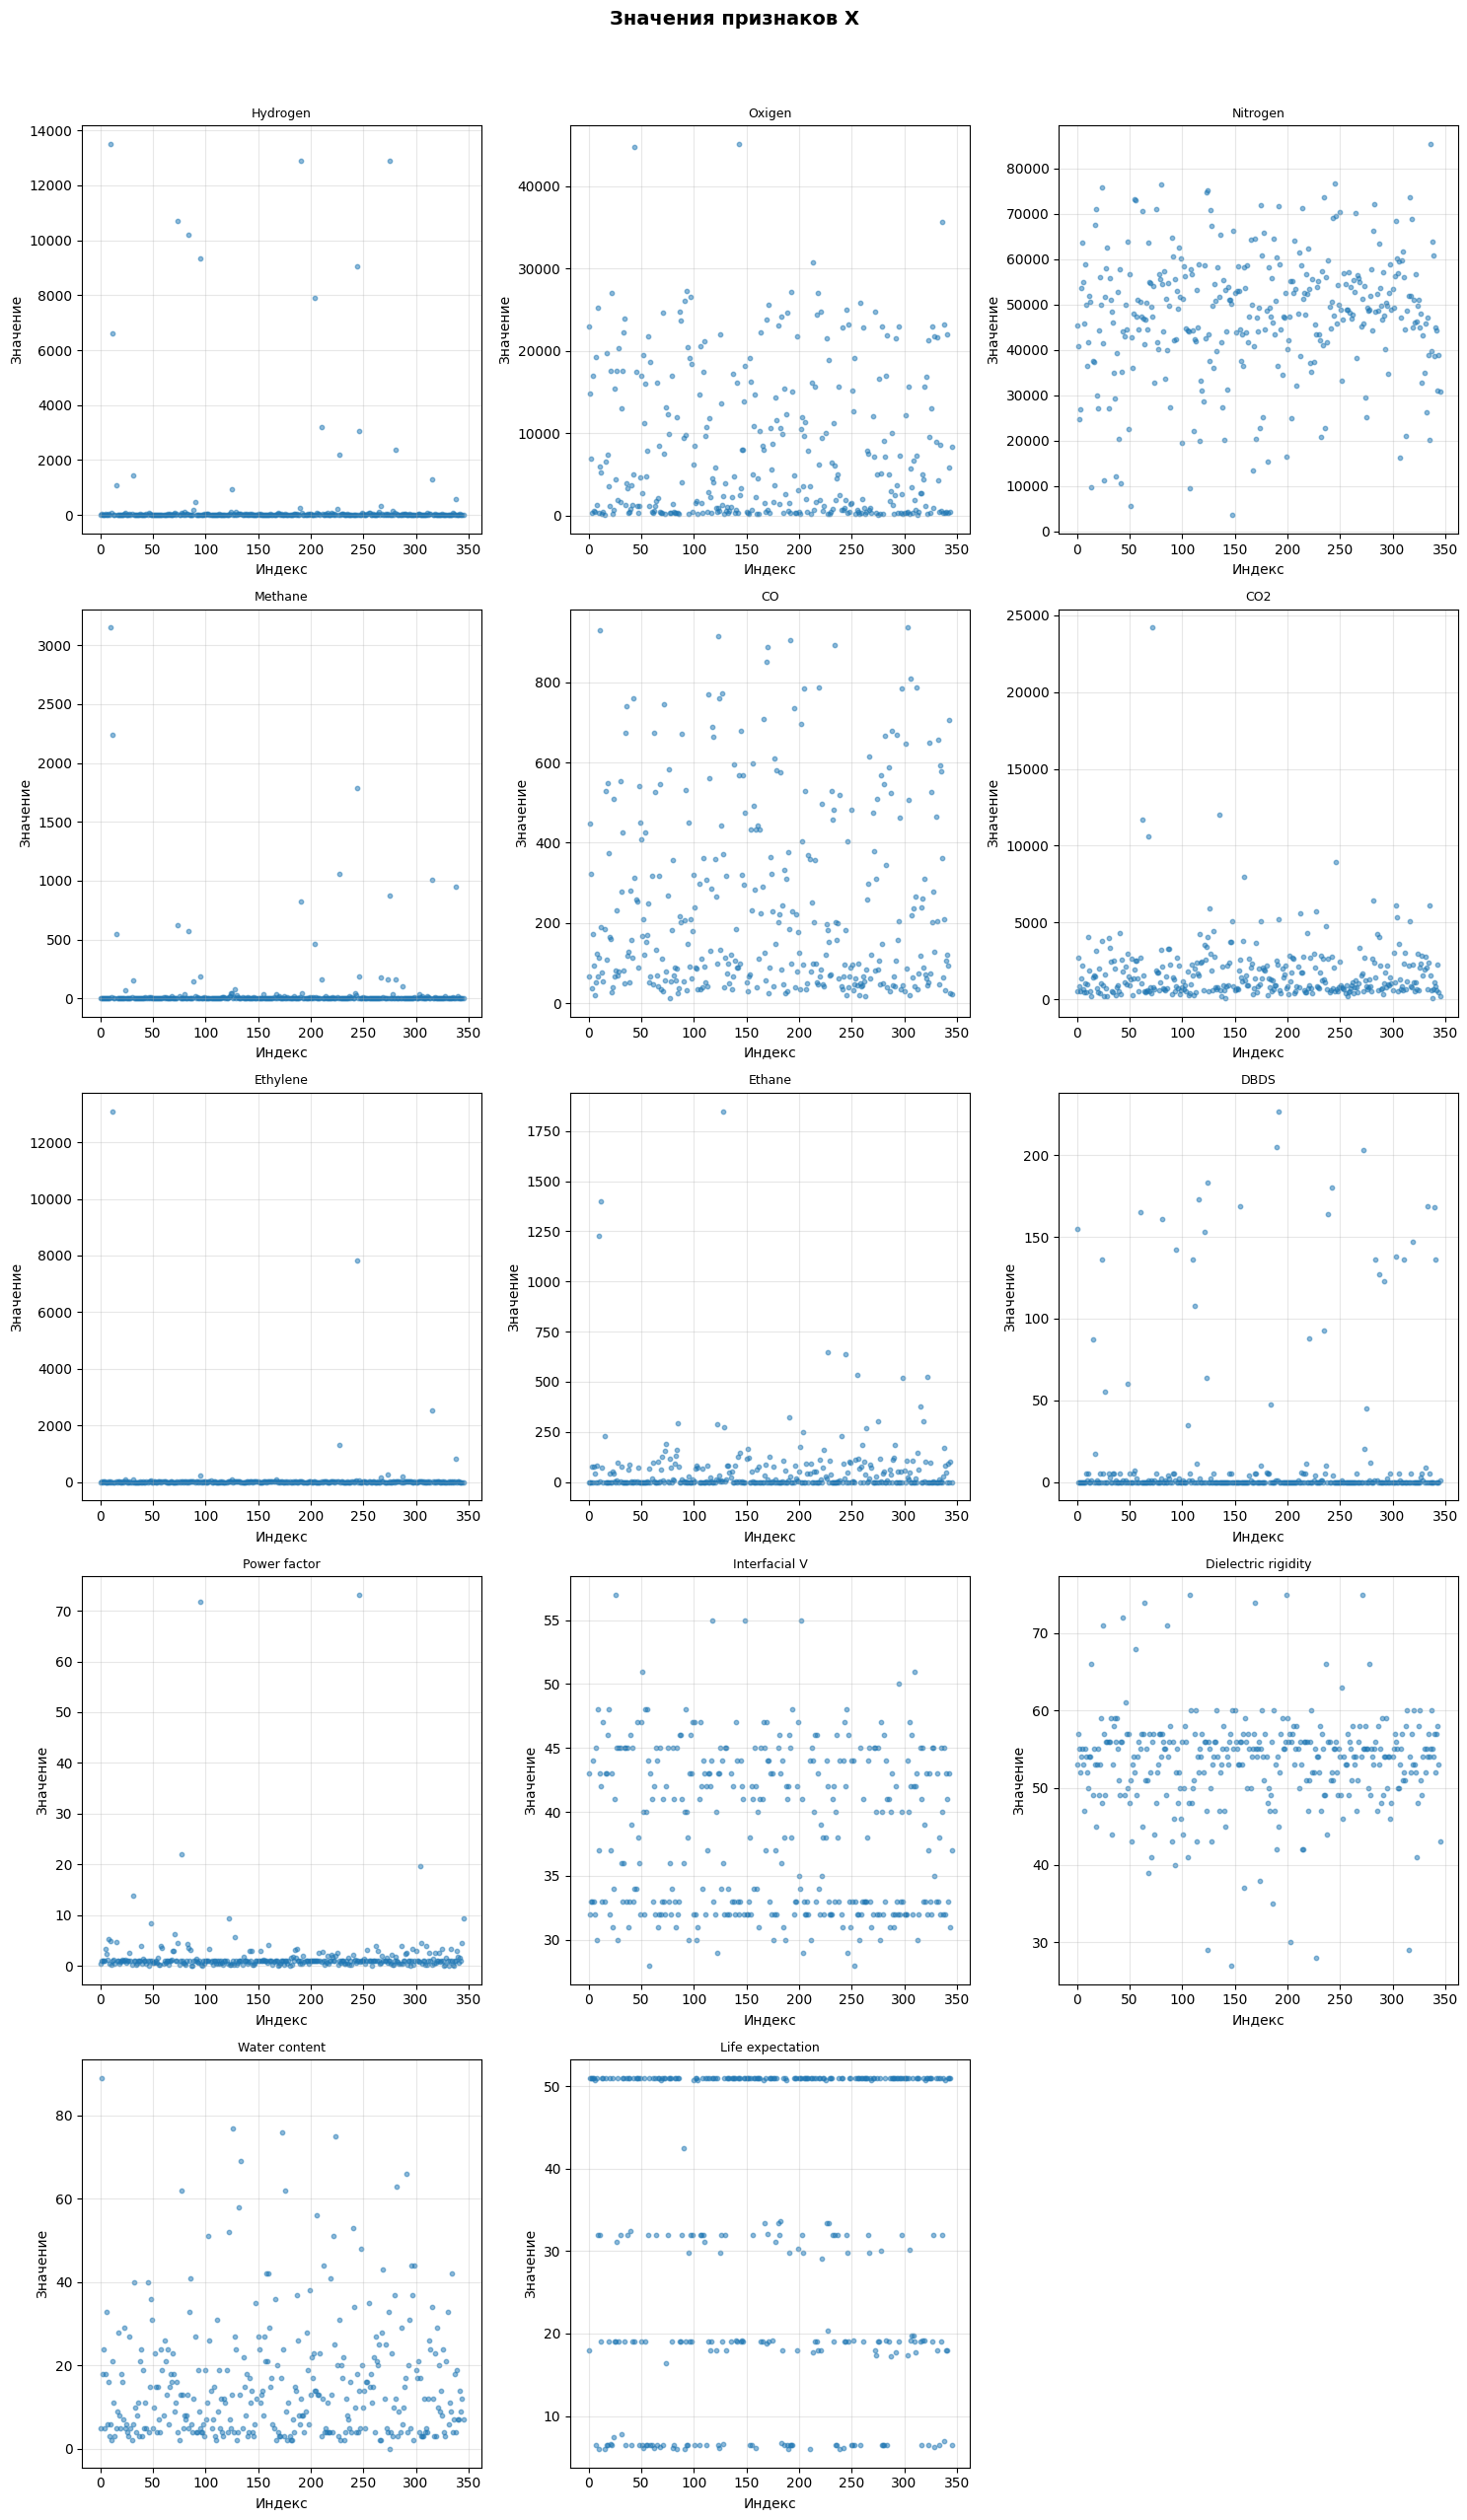

In [1589]:
import matplotlib.pyplot as plt
import numpy as np

# Количество признаков
n_features = X.shape[1]

# Создаем сетку графиков
fig, axes = plt.subplots((n_features+2)//3, 3, figsize=(15, 5*((n_features+2)//3)))
axes = axes.flatten()

# Простой scatter plot для каждого признака
for i, col in enumerate(X.columns):
    # Просто точки: индекс строки vs значение признака
    axes[i].scatter(range(len(X)), X[col], s=10, alpha=0.5)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel('Индекс')
    axes[i].set_ylabel('Значение')
    axes[i].grid(True, alpha=0.3)

# Скрываем пустые подграфики
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Значения признаков X', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [1590]:
print(df.info(),test.info(),X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 351
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             346 non-null    int64  
 1   Oxigen               346 non-null    int64  
 2   Nitrogen             346 non-null    int64  
 3   Methane              346 non-null    int64  
 4   CO                   346 non-null    int64  
 5   CO2                  346 non-null    int64  
 6   Ethylene             346 non-null    int64  
 7   Ethane               346 non-null    int64  
 8   Acethylene           346 non-null    int64  
 9   DBDS                 346 non-null    float64
 10  Power factor         346 non-null    float64
 11  Interfacial V        346 non-null    int64  
 12  Dielectric rigidity  346 non-null    int64  
 13  Water content        346 non-null    int64  
 14  Health index         346 non-null    float64
 15  Life expectation     346 non-null    float64


In [1591]:
X.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Life expectation
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,336.982659,7958.699422,47931.439306,50.187861,250.479769,1752.011561,81.494220,57.367052,14.008092,1.800983,38.479769,53.375723,15.872832,33.560694
std,1707.650684,8903.803862,13596.763656,259.777289,233.715003,2024.846148,833.096202,163.608461,42.192426,5.776400,6.138583,6.324820,14.745218,18.044756
min,0.000000,61.000000,3600.000000,0.000000,12.000000,51.000000,0.000000,0.000000,0.000000,0.060000,28.000000,27.000000,0.000000,6.000000
25%,3.250000,510.250000,41925.000000,2.000000,66.250000,646.000000,0.000000,0.000000,0.000000,0.580000,33.000000,51.000000,5.000000,19.000000
50%,9.000000,4070.000000,49100.000000,3.000000,155.500000,1115.000000,3.000000,3.000000,0.000000,1.000000,39.000000,54.000000,12.000000,32.000000
75%,34.000000,14600.000000,55950.000000,6.000000,379.000000,2247.500000,5.000000,67.750000,2.000000,1.015000,44.000000,56.000000,21.000000,51.000000
max,13500.000000,45100.000000,85300.000000,3150.000000,936.000000,24200.000000,13100.000000,1850.000000,227.000000,73.200000,57.000000,75.000000,89.000000,51.000000


In [1592]:
print(f'Features size: {X.shape}')
print(f'Target size: {y.shape}')

Features size: (346, 14)
Target size: (346,)


In [1593]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (294, 14), (294,)
Train dataset size: (52, 14), (52,)


In [1594]:
#стандартизация

In [1595]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

std.fit(X) # train.csv

X_train_std = std.transform(X_train) # train.csv
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
X_test_std = std.transform(X_test) # test.csv
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
X_test_test = std.transform(test) # test.csv
X_test_test = pd.DataFrame(X_test_test, columns=X.columns)
X_train_full = std.transform(X) # test.csv
X_train_full = pd.DataFrame(X_train_full, columns=X.columns)
X_train_std.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Life expectation
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.011187,0.001692,0.048470,0.010120,-0.013657,-0.040849,0.013250,0.023986,-0.008927,0.009129,-0.029438,-0.025561,-0.018160,-0.039159
std,1.029856,1.019667,0.995730,1.058686,0.989325,0.817382,1.084628,1.076926,0.984417,1.063975,0.998941,0.969343,0.959507,1.009142
min,-0.197623,-0.888287,-3.265162,-0.193476,-1.000440,-0.820514,-0.097963,-0.351144,-0.332486,-0.301832,-1.709669,-4.017896,-1.078032,-1.529564
25%,-0.195277,-0.839361,-0.359535,-0.185765,-0.790480,-0.547877,-0.097963,-0.351144,-0.332486,-0.208213,-1.057109,-0.376163,-0.738448,-0.856650
50%,-0.192345,-0.469434,0.137626,-0.181910,-0.417692,-0.322472,-0.094356,-0.332781,-0.332486,-0.138865,-0.078269,0.098846,-0.263030,-0.086615
75%,-0.177244,0.746975,0.621897,-0.170345,0.527131,0.227748,-0.090750,0.025298,-0.308750,-0.135398,0.900570,0.415518,0.348221,0.967847
max,7.719424,4.177438,2.752323,11.949857,2.937394,5.068449,15.649285,10.972715,5.055418,12.378370,3.021390,3.423907,4.966564,0.967847


In [1596]:
#Нормализация

In [1597]:
mmsc = MinMaxScaler()

X_train_norm = mmsc.fit_transform(X_train)

X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns)
X_test_norm = mmsc.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X.columns)
print(X_train_norm.describe())
X_train_norm

         Hydrogen      Oxigen    Nitrogen     Methane          CO         CO2  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean     0.026375    0.175687    0.550667    0.016766    0.250590    0.132394   
std      0.130081    0.201287    0.165473    0.087183    0.251236    0.138799   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000296    0.009658    0.482864    0.000635    0.053319    0.046296   
50%      0.000667    0.082684    0.565483    0.000952    0.147987    0.084572   
75%      0.002574    0.322809    0.645961    0.001905    0.387922    0.178005   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Ethylene      Ethane        DBDS  Power factor  Interfacial V  \
count  294.000000  294.000000  294.000000    294.000000     294.000000   
mean     0.007062    0.033127    0.060053      0.024523       0.355149   
std      0.068877    0.095102    0.182709      0

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Life expectation
0,0.000296,0.089012,0.334149,0.001905,0.704026,0.197111,0.000000,0.000000,0.000000,0.012852,0.172414,0.617021,0.123596,1.000000
1,0.000296,0.491552,0.548348,0.000000,0.070729,0.034098,0.000000,0.000000,0.000000,0.012852,0.275862,0.340426,0.112360,1.000000
2,0.000296,0.103888,0.851897,0.000635,0.149075,0.152599,0.000611,0.000000,0.030837,0.020372,0.413793,0.510638,0.168539,0.011111
3,0.001778,0.004352,0.637699,0.000635,0.032644,0.033762,0.000305,0.056757,0.000000,0.042521,0.103448,0.595745,0.168539,1.000000
4,0.000444,0.256200,0.500612,0.001587,0.613711,0.149240,0.000000,0.000000,0.000000,0.012852,0.137931,0.617021,0.123596,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.000963,0.271742,0.487148,0.000000,0.317737,0.068447,0.000000,0.000000,0.000000,0.012852,0.482759,0.404255,0.292135,0.993333
290,0.006741,0.544839,0.560588,0.001587,0.015234,0.027463,0.000000,0.003243,0.004405,0.083402,0.448276,0.276596,0.101124,0.011111
291,0.000222,0.453807,0.494492,0.000000,0.019587,0.016545,0.000000,0.000000,0.004405,0.012852,0.655172,0.425532,0.056180,0.577778
292,0.000667,0.265081,0.507956,0.001270,0.498368,0.124045,0.000000,0.000000,0.000000,0.012852,0.137931,0.553191,0.134831,1.000000


In [1598]:
print(f'Features size: {X_train_full.shape}')
print(f'Target size: {y.shape}')

Features size: (346, 14)
Target size: (346,)


In [1599]:
#Для стандартизированных данных

In [1600]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_full,y)
print(model.coef_)
y_pred = model.predict(X_test_std)
y_pred_test = model.predict(X_test_test)

[ 3.51291682  0.03113136  0.61673802  3.34359941  1.12341433 -0.78239908
 -0.35321071 -0.42081329  5.00268833  1.05835691  1.61892075  0.67396046
  0.43167411 -7.1788298 ]


In [1601]:
'''
sample_submition['Health index'] = y_pred_test

sample_submition.to_csv('my_submit.csv', index=False)
'''

"\nsample_submition['Health index'] = y_pred_test\n\nsample_submition.to_csv('my_submit.csv', index=False)\n"

In [1602]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error




In [1603]:
ridge = Ridge(alpha=140)
ridge.fit(X_train_std, y_train)

print("MSE test:", mean_squared_error(y_test, ridge.predict(X_test_std)))

MSE test: 154.49744735734603


In [1604]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.6)
lasso.fit(X_train_std, y_train)

print("MSE test:", mean_squared_error(y_test, lasso.predict(X_test_std)))

MSE test: 137.1543339907941


In [1605]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNet(alpha=0.9, l1_ratio=0.9)
elastic.fit(X_train_std, y_train)

print("MSE test:", mean_squared_error(y_test, elastic.predict(X_test_std)))
y_pred_test_reg = elastic.predict(X_test_test)


MSE test: 135.17426432500687


In [1606]:

sample_submition['Health index'] = y_pred_test_reg

sample_submition.to_csv('my_submit_end.csv', index=False)
